# Презентация

https://disk.yandex.ru/i/G3UW6hiLJIQagQ

# Набор дашборда №1

https://public.tableau.com/views/Book1_16898373145720/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Набор дашборда №2

https://public.tableau.com/views/second_dash/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Исследование в «Юпитере»

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
! pip install phik
! pip install catboost
! pip install shap
import shap
shap.initjs()
import phik
from catboost import CatBoostClassifier

## Подготовка данных

In [2]:
df = pd.read_csv('bank_scrooge.csv')

In [3]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Проверка пропусков и типов данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
df = df[df['products'] > 0]

#### Вывод:
Пропуски есть в столбцах age и balance

### Смена регистра у названий столбцов

In [6]:
df = df.rename(columns={'USERID':'user_id','EST_SALARY':'est_salary'})

### Анализ столбца balance

In [7]:
pd.options.display.float_format ='{:,.3f}'.format

In [8]:
df['balance'].describe()

count         7,705.000
mean        827,794.307
std       1,980,614.147
min               0.000
25%         295,554.160
50%         524,272.200
75%         980,705.850
max     119,113,552.010
Name: balance, dtype: float64

<AxesSubplot:>

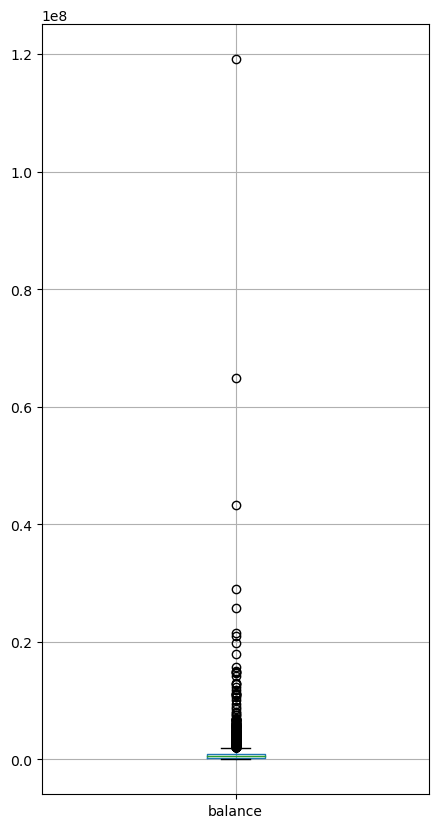

In [9]:
df.boxplot(column='balance', figsize = (5,10))

#### Вывод:
Очень много нулевых балансов и пустых значений, также достаточно много выбосов. Какие-либо преобразования в пустых значениях могут привести к нежелательных результатам и дезинформации. Поэтому на данном этапе я оставлю всё как есть.

In [10]:
df['est_salary'].describe()

count       9,999.000
mean      147,879.167
std       139,390.070
min         2,546.300
25%        75,252.125
50%       119,661.510
75%       174,501.125
max     1,395,064.450
Name: est_salary, dtype: float64

In [11]:
null_balance = df[df['balance'].isna()]

In [12]:
null_balance.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"2,294.000","2,294.000","2,278.000","2,294.000",0.000,"2,294.000","2,294.000","2,294.000","2,294.000","2,294.000"
mean,"172,080.011",865.310,42.077,0.050,NaN,1.163,0.816,0.550,"226,397.936",0.005
std,"33,340.511",89.600,11.919,0.217,NaN,0.402,0.388,0.498,"199,771.129",0.072
min,"114,182.000",642.000,18.000,0.000,NaN,1.000,0.000,0.000,"20,274.030",0.000
25%,"143,091.750",871.000,33.000,0.000,NaN,1.000,1.000,0.000,"120,418.205",0.000
50%,"172,713.500",903.000,40.000,0.000,NaN,1.000,1.000,1.000,"174,202.800",0.000
75%,"201,554.000",922.000,49.000,0.000,NaN,1.000,1.000,1.000,"240,070.557",0.000
max,"229,145.000",990.000,86.000,1.000,NaN,3.000,1.000,1.000,"1,333,687.360",1.000


In [13]:
df['balance'].corr(df['equity'])

0.16412649711939362

In [14]:
df.plot(y='balance', x='equity', kind='scatter')

<AxesSubplot:xlabel='equity', ylabel='balance'>

In [15]:
null_balance['est_salary'].hist(bins = 20)

<AxesSubplot:xlabel='equity', ylabel='balance'>

In [16]:
null_balance['score'].hist(bins = 20)

<AxesSubplot:xlabel='equity', ylabel='balance'>

### Поиск дубликатов

In [17]:
df.duplicated().sum()

0

In [18]:
for column in df.columns:
    print(column ,df[column].duplicated().sum())

user_id 73
score 9651
city 9996
gender 9997
age 9930
equity 9989
balance 2297
products 9994
credit_card 9997
last_activity 9997
est_salary 4
churn 9997


In [19]:
'''Вся информация о дубликатах в столбцах неинфоративна,
   кроме столбца user_id, в котором, в общем случае, дубликатов не может быть.
   Проверю дубликаты в связке id-city'''

df[['user_id','city']].duplicated().sum()

0

#### Вывод:
Явных дубликатов нет. Для данной таблицы свойственны дубликаты в столбце user_id, однако айдишники могут дублироваться в глобальном масштабе (вся база), в локальном масштабе (например конкретный город город), дубликатов нет может.

### Кодирование категориальных переменных (город, пол)

In [20]:
def gender(df):
    return(df['gender'] == 'М')

In [21]:
df['cod_gender'] = df.apply(gender, axis=1)

In [22]:
df = pd.concat([df, pd.get_dummies(df['city'])], axis=1)

In [23]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,cod_gender,Ростов,Рыбинск,Ярославль
0,183012,850.000,Рыбинск,Ж,25.000,1,"59,214.820",2,0,1,"75,719.140",1,False,0,1,0
1,146556,861.000,Рыбинск,Ж,37.000,5,"850,594.330",3,1,0,"86,621.770",0,False,0,1,0
2,120722,892.000,Рыбинск,Ж,30.000,0,NaN,1,1,1,"107,683.340",0,False,0,1,0
3,225363,866.000,Ярославль,Ж,51.000,5,"1,524,746.260",2,0,1,"174,423.530",1,False,0,0,1
4,157978,730.000,Ярославль,М,34.000,5,174.000,1,1,0,"67,353.160",1,True,0,0,1


## Исследовательский анализ данных (EDA)

### Оценка распределения числовых переменных (score, age, balance, products, estimated_salary)

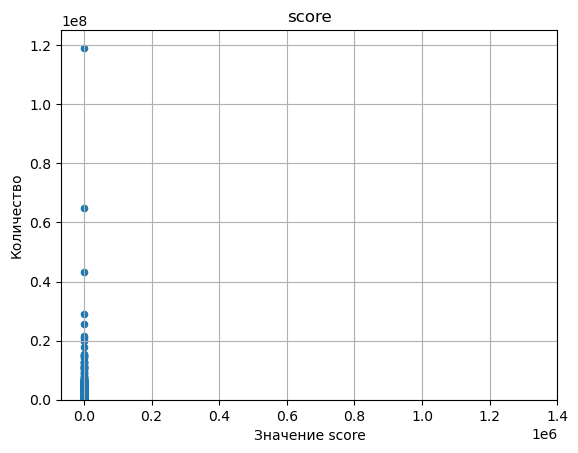

count   9,999.000
mean      848.688
std        65.442
min       642.000
25%       802.000
50%       853.000
75%       900.000
max     1,000.000
Name: score, dtype: float64
mode = 0   900.000
Name: score, dtype: float64


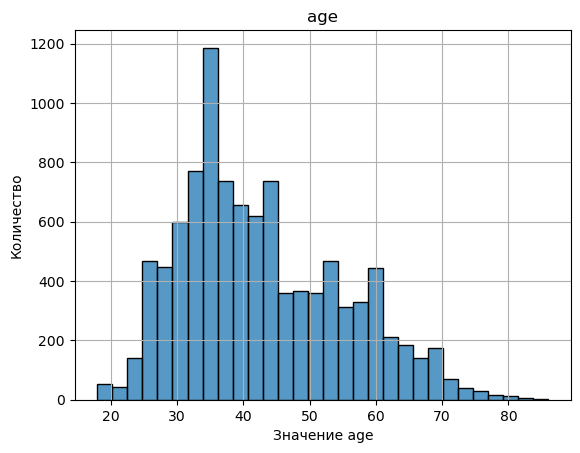

count   9,973.000
mean       42.731
std        12.175
min        18.000
25%        33.000
50%        40.000
75%        51.000
max        86.000
Name: age, dtype: float64
mode = 0   36.000
Name: age, dtype: float64


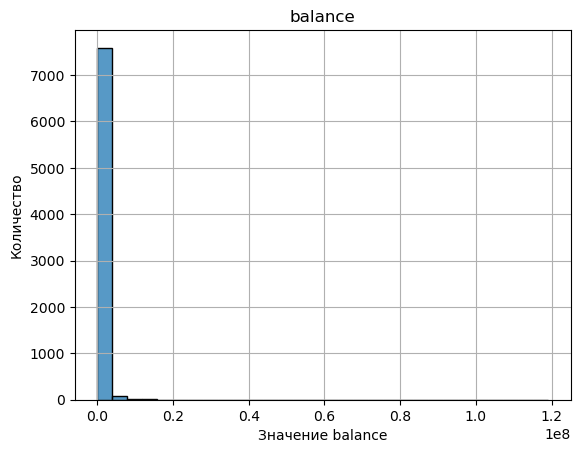

count         7,705.000
mean        827,794.307
std       1,980,614.147
min               0.000
25%         295,554.160
50%         524,272.200
75%         980,705.850
max     119,113,552.010
Name: balance, dtype: float64
mode = 0    0.000
1   26.000
2   38.000
3   39.000
Name: balance, dtype: float64


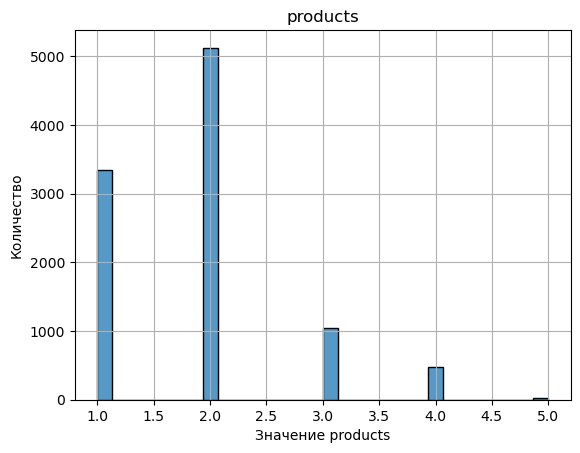

count   9,999.000
mean        1.870
std         0.792
min         1.000
25%         1.000
50%         2.000
75%         2.000
max         5.000
Name: products, dtype: float64
mode = 0    2
Name: products, dtype: int64


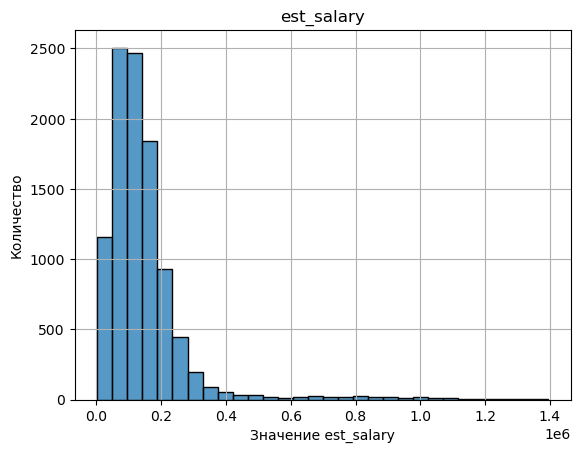

count       9,999.000
mean      147,879.167
std       139,390.070
min         2,546.300
25%        75,252.125
50%       119,661.510
75%       174,501.125
max     1,395,064.450
Name: est_salary, dtype: float64
mode = 0    49,742.870
1   108,250.170
2   176,348.180
3   381,868.890
Name: est_salary, dtype: float64


In [24]:
for i in ['score', 'age', 'balance', 'products', 'est_salary']:
    #df[i].hist()
    sns.histplot(df[i].dropna(), bins=30, kde=False)
    plt.xlabel(f'Значение {i}')
    plt.ylabel('Количество')
#     if i == 'balance':
#         # Хотелось бы рассмотреть распределение без нулевых значений
#         plt.xlim(np.percentile(df[df['balance'].notna()]['balance'],10),np.percentile(df[df['balance'].notna()]['balance'],99))
    plt.title(i)
    plt.grid(True)
    plt.show()
    print(df[i].describe())
    print('mode =', df[df[i].notna()][i].mode(True))

Я понял, что максимальное значение данных по балансу сильно искажает визуализацию. Поэтому я создал копию, в которой исключил значения после 99 перцентиля.

In [25]:
copy_df = df.copy()

In [26]:
copy_df = copy_df[copy_df['balance'] < np.percentile(df[df['balance'].notna()]['balance'],99)]

In [27]:
pd.cut(copy_df[copy_df['balance'].notna()]['balance'], 100).reset_index().groupby('balance')['index'].count().reset_index()


,balance,index
0,"(-4827.196, 48271.957]",158
1,"(48271.957, 96543.913]",205
2,"(96543.913, 144815.87]",304
3,"(144815.87, 193087.827]",361
4,"(193087.827, 241359.784]",391
...,...,...
95,"(4585835.886, 4634107.843]",2
96,"(4634107.843, 4682379.8]",1
97,"(4682379.8, 4730651.757]",2
98,"(4730651.757, 4778923.713]",3


In [28]:
abc = pd.cut(copy_df[copy_df['balance'].notna()]['balance'], 50).reset_index().groupby('balance')['index'].count().reset_index()

<Figure size 1000x1500 with 0 Axes>

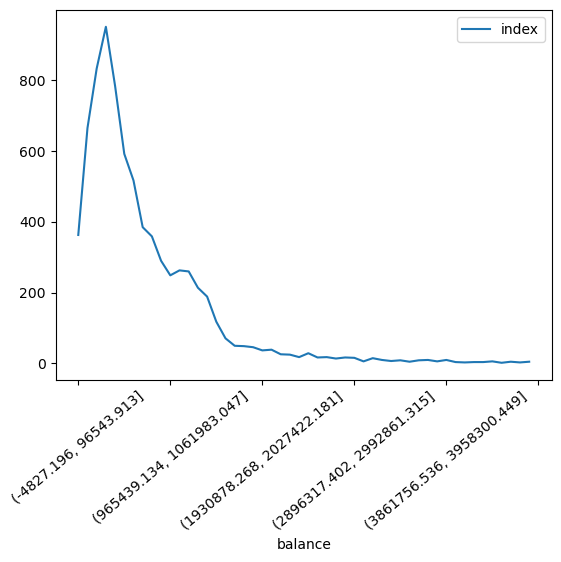

In [29]:
plt.figure(figsize=(10,15))
abc.plot(x='balance', y='index')
# plt.figure(figsize=(15,15))
plt.xticks(rotation=40)
plt.show()

In [30]:
# Здесь я решил посмотреть значения каждого перцентиля после 75
display(copy_df[copy_df['balance'].notna()]['balance'].describe())
for i in range(75,101):
    print(i,'перцентиль =', np.percentile(df[df['balance'].notna()]['balance'],i))

count       7,627.000
mean      717,733.273
std       653,574.990
min             0.000
25%       293,513.835
50%       516,893.580
75%       961,139.715
max     4,827,195.670
Name: balance, dtype: float64

75 перцентиль = 980705.85
76 перцентиль = 1011301.2296000001
77 перцентиль = 1041526.6244
78 перцентиль = 1071498.7836
79 перцентиль = 1098738.766
80 перцентиль = 1125547.2000000002
81 перцентиль = 1153039.0168
82 перцентиль = 1185912.1028
83 перцентиль = 1208484.3324
84 перцентиль = 1239419.4623999998
85 перцентиль = 1276371.7799999998
86 перцентиль = 1306509.166
87 перцентиль = 1341775.2084
88 перцентиль = 1377670.4240000003
89 перцентиль = 1410728.9376
90 перцентиль = 1460133.708
91 перцентиль = 1522824.7060000014
92 перцентиль = 1616429.2072000003
93 перцентиль = 1759869.2628000001
94 перцентиль = 1913024.9455999983
95 перцентиль = 2116704.7839999963
96 перцентиль = 2423327.7380000013
97 перцентиль = 2822284.6468000007
98 перцентиль = 3441014.7008
99 перцентиль = 4827443.494
100 перцентиль = 119113552.01


#### Вывод:
- По показателю SCORE: большенство клиентов имеют оценку в диапозоне от ~750 до ~900. Мода = 900
- По показателю AGE: возраст большенства клиентов от 25 до 45. Мода = 36
- По показателю BALANCE: основной объём клиентов держит насчету не больше миллиона. Модальный диапозон ~ 96543 до 675807
- По показателю PRODUCTS: в оновном клиенты пользуются либо одни, либо двумя продуктами. Причём 2 продукта самое популярное значение
- По показателю EST_SALARY: большенство получает не больше 170000

### Оценка распределения категориальных переменных (city, gender, credit_card, last_activity)

In [31]:
cities = ['Ростов', 'Рыбинск', 'Ярославль']

In [32]:
score_city = {}
for i in cities:
    j = sum(df[i])
    score_city[i] = j

In [33]:
score_city = pd.Series(score_city)

In [34]:
score_city = score_city.reset_index()
score_city.columns = ['city', 'count']

In [35]:
score_city.plot(x='city', y='count', kind='bar')

<AxesSubplot:xlabel='city'>

In [36]:
display(df.groupby('cod_gender')['user_id'].count())
print('Количество мужчин-клиентов составляет долю =',df['cod_gender'].mean())

cod_gender
False    4994
True     5005
Name: user_id, dtype: int64

Количество мужчин-клиентов составляет долю = 0.5005500550055005


In [37]:
display(df.groupby('credit_card')['user_id'].count())
print('Количество клиентов с кредиткой составляет долю =',df['credit_card'].mean())

credit_card
0    3195
1    6804
Name: user_id, dtype: int64

Количество клиентов с кредиткой составляет долю = 0.6804680468046804


In [38]:
df['last_activity'].mean()

0.5235523552355236

#### Вывод:
- В Ярославле самое большое количество клиентов, затем Рыбинск и Ростов.
- Мужчин и женщин равное количество в данной таблице.
- 68% клиентов обладают кредитной картой
- 52% активных пользователей

### Анализ взаимосвязи между переменными и оттоком клиентов

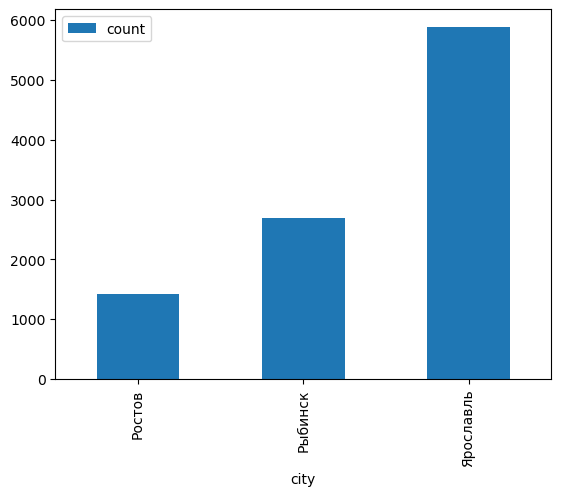

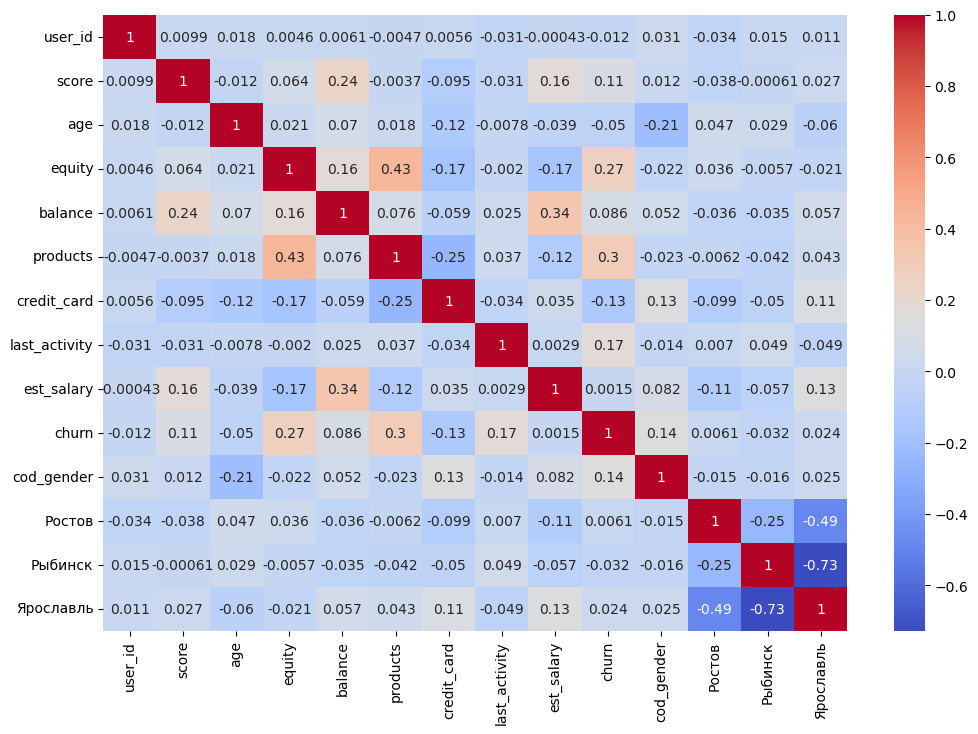

In [39]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

- equity и products имеют положительную корреляцию (0.432), что говорит о том, что при увеличении значений одной переменной увеличиваются и значения другой.
- credit_card и products имеют отрицательную корреляцию (-0.251), что указывает на то, что при увеличении значений одной переменной значения другой уменьшаются.
- churn и products имеют положительную корреляцию (0.301), что может говорить о том, что количество продуктов влияет на отток клиентов.
- churn и credit_card имеют отрицательную корреляцию (-0.131), что может говорить о том, что использование кредитной карты связано с уменьшением оттока клиентов.
- balance и est_salary имеют довольно высокий положительный коэффициент корреляции (0.340), что указывает на то, что есть сильная положительная связь между балансом на счету и оценочной зарплатой.

In [40]:
# посчитаю население в каждом городе
citizen = df.groupby('city')['user_id'].count().reset_index().rename(columns={'user_id':'sum'})
# Посчитаю процент уходящих в каждом населённом пункте
city_table = df.groupby(['churn','city'])['cod_gender'].count()\
                    .reset_index()\
                    .rename(columns={'cod_gender':'count'})\
                    .merge(citizen, how='left', left_on='city', right_on='city')
city_table['percent'] = city_table['count'] / city_table['sum']
city_table = city_table.drop(labels=[0,1,2])
city_table = city_table.reset_index().drop(columns=['index','churn'])
city_table

,city,count,sum,percent
0,Ростов,266,1417,0.188
1,Рыбинск,436,2694,0.162
2,Ярославль,1117,5888,0.190


In [41]:
churn_df = df[df['churn'] == 1]

In [42]:
df.groupby('cod_gender')['churn'].mean().reset_index()

,cod_gender,churn
0,False,0.127
1,True,0.236


In [43]:
churn_df.groupby(['city'])['cod_gender'].mean().reset_index()

,city,cod_gender
0,Ростов,0.658
1,Рыбинск,0.683
2,Ярославль,0.636


In [44]:
display(df[(df['churn'] == 1)&(df['balance']>10)&(df['balance']<10000000)]['balance'].describe())
df[(df['churn'] == 1)&(df['balance']>10)&(df['balance']<10000000)]['balance'].hist()

count       1,795.000
mean    1,028,126.283
std       963,675.921
min            42.000
25%       385,476.330
50%       775,433.750
75%     1,335,746.915
max     9,346,657.080
Name: balance, dtype: float64

<AxesSubplot:>

In [45]:
percentiles = [i/100 for i in range(0, 101, 10)]

In [46]:
df['range_balance'] = pd.qcut(df['balance'], q=percentiles)
df['range_salary'] = pd.qcut(df['est_salary'], q=percentiles)
df['range_age'] = pd.qcut(df['age'], q=percentiles)
df['range_score'] = pd.qcut(df['score'], q=percentiles)

In [47]:
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,cod_gender,Ростов,Рыбинск,Ярославль,range_balance,range_salary,range_age,range_score
0,183012,850.000,Рыбинск,Ж,25.000,1,"59,214.820",2,0,1,"75,719.140",1,False,0,1,0,"(-0.001, 159201.964]","(66407.932, 83932.904]","(17.999, 29.0]","(832.0, 853.0]"
1,146556,861.000,Рыбинск,Ж,37.000,5,"850,594.330",3,1,0,"86,621.770",0,False,0,1,0,"(660138.374, 853606.368]","(83932.904, 101314.552]","(35.0, 37.0]","(853.0, 873.0]"
2,120722,892.000,Рыбинск,Ж,30.000,0,NaN,1,1,1,"107,683.340",0,False,0,1,0,NaN,"(101314.552, 119661.51]","(29.0, 32.0]","(873.0, 892.0]"
3,225363,866.000,Ярославль,Ж,51.000,5,"1,524,746.260",2,0,1,"174,423.530",1,False,0,0,1,"(1460133.708, 119113552.01]","(161602.132, 189220.662]","(48.0, 54.0]","(853.0, 873.0]"
4,157978,730.000,Ярославль,М,34.000,5,174.000,1,1,0,"67,353.160",1,True,0,0,1,"(-0.001, 159201.964]","(66407.932, 83932.904]","(32.0, 35.0]","(641.999, 765.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.000,Рыбинск,М,27.000,1,"78,144.650",1,0,1,"18,943.640",0,True,0,1,0,"(-0.001, 159201.964]","(2546.299, 45485.848]","(17.999, 29.0]","(812.0, 832.0]"
9996,139170,894.000,Ярославль,М,46.000,0,NaN,1,1,0,"196,898.290",0,True,0,0,1,NaN,"(189220.662, 242397.334]","(44.0, 48.0]","(892.0, 908.0]"
9997,115639,903.000,Ярославль,М,24.000,0,NaN,2,1,1,"108,905.090",0,True,0,0,1,NaN,"(101314.552, 119661.51]","(17.999, 29.0]","(892.0, 908.0]"
9998,148700,777.000,Ярославль,Ж,68.000,3,"865,457.970",3,0,1,"86,874.900",0,False,0,0,1,"(853606.368, 1125547.2]","(83932.904, 101314.552]","(61.0, 86.0]","(765.0, 791.0]"


In [48]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
count,"9,999.000","9,999.000","9,973.000","9,999.000","7,705.000","9,999.000","9,999.000","9,999.000","9,999.000","9,999.000","9,999.000","9,999.000","9,999.000"
mean,"171,817.111",848.688,42.731,2.628,"827,794.307",1.870,0.680,0.524,"147,879.167",0.182,0.142,0.269,0.589
std,"33,709.071",65.442,12.175,1.981,"1,980,614.147",0.792,0.466,0.499,"139,390.070",0.386,0.349,0.444,0.492
min,"94,561.000",642.000,18.000,0.000,0.000,1.000,0.000,0.000,"2,546.300",0.000,0.000,0.000,0.000
25%,"142,809.500",802.000,33.000,0.000,"295,554.160",1.000,0.000,0.000,"75,252.125",0.000,0.000,0.000,0.000
50%,"172,740.000",853.000,40.000,3.000,"524,272.200",2.000,1.000,1.000,"119,661.510",0.000,0.000,0.000,1.000
75%,"201,262.500",900.000,51.000,4.000,"980,705.850",2.000,1.000,1.000,"174,501.125",0.000,0.000,1.000,1.000
max,"229,145.000","1,000.000",86.000,9.000,"119,113,552.010",5.000,1.000,1.000,"1,395,064.450",1.000,1.000,1.000,1.000


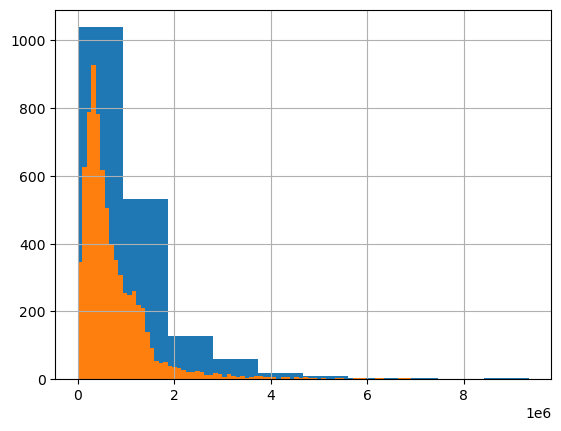

In [49]:
df[df['balance']< 10000000]['balance'].hist(bins=100)
plt.show()

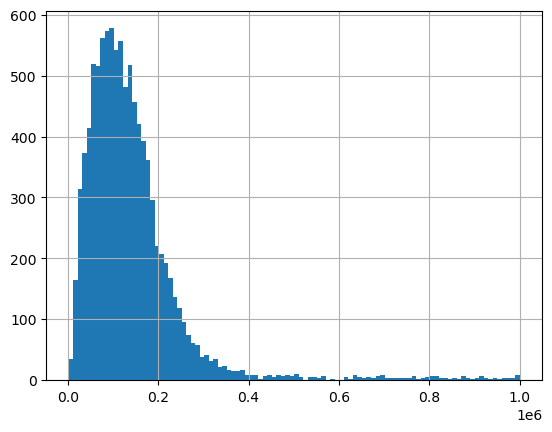

In [50]:
df[(df['est_salary'] < 1000000)&(df['est_salary'] > 0)]['est_salary'].hist(bins=100)
plt.show()

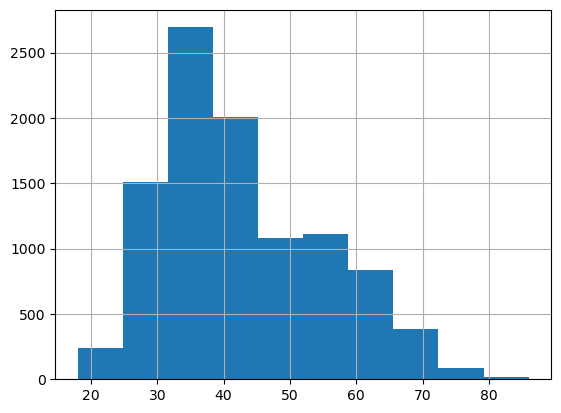

In [51]:
df['age'].hist(bins=10)
plt.show()

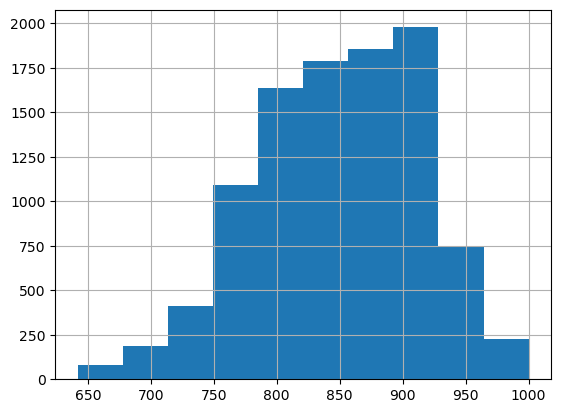

In [52]:
df['score'].hist(bins=10)
plt.show()

In [53]:
num_bins_big = 100
num_bins_small = 10 # Выберите нужное вам количество корзин

churn_df = df[df['churn'] == 1].copy()

# Разбиваем значения в каждом столбце на корзины
for col in ['balance', 'est_salary', 'age', 'score']:
    num_bins=num_bins_big
    min_val = churn_df[col].min()
    max_val = churn_df[col].max()
    if col in ['age', 'score']:
        num_bins=num_bins_small
    bins = np.linspace(min_val, max_val, num_bins+1)  # Создаём равномерное разбиение от min до max на num_bins корзин
    churn_df['range_' + col] = pd.cut(churn_df[col], bins=bins)


In [54]:
not_churn_df = df[df['churn'] == 0].copy()

In [55]:
not_churn_df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,cod_gender,Ростов,Рыбинск,Ярославль,range_balance,range_salary,range_age,range_score
1,146556,861.000,Рыбинск,Ж,37.000,5,"850,594.330",3,1,0,"86,621.770",0,False,0,1,0,"(660138.374, 853606.368]","(83932.904, 101314.552]","(35.0, 37.0]","(853.0, 873.0]"
2,120722,892.000,Рыбинск,Ж,30.000,0,NaN,1,1,1,"107,683.340",0,False,0,1,0,NaN,"(101314.552, 119661.51]","(29.0, 32.0]","(873.0, 892.0]"
5,202305,856.000,Рыбинск,М,56.000,4,"863,687.240",3,1,0,"156,619.800",0,True,0,1,0,"(853606.368, 1125547.2]","(139376.386, 161602.132]","(54.0, 61.0]","(853.0, 873.0]"
6,177259,807.000,Ярославль,Ж,39.000,3,"405,042.440",3,0,1,"103,838.320",0,False,0,0,1,"(337258.922, 419603.476]","(101314.552, 119661.51]","(37.0, 40.0]","(791.0, 812.0]"
7,218868,825.000,Ярославль,Ж,38.000,4,"458,145.400",2,1,1,"68,085.480",0,False,0,0,1,"(419603.476, 524272.2]","(66407.932, 83932.904]","(37.0, 40.0]","(812.0, 832.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.000,Рыбинск,М,27.000,1,"78,144.650",1,0,1,"18,943.640",0,True,0,1,0,"(-0.001, 159201.964]","(2546.299, 45485.848]","(17.999, 29.0]","(812.0, 832.0]"
9996,139170,894.000,Ярославль,М,46.000,0,NaN,1,1,0,"196,898.290",0,True,0,0,1,NaN,"(189220.662, 242397.334]","(44.0, 48.0]","(892.0, 908.0]"
9997,115639,903.000,Ярославль,М,24.000,0,NaN,2,1,1,"108,905.090",0,True,0,0,1,NaN,"(101314.552, 119661.51]","(17.999, 29.0]","(892.0, 908.0]"
9998,148700,777.000,Ярославль,Ж,68.000,3,"865,457.970",3,0,1,"86,874.900",0,False,0,0,1,"(853606.368, 1125547.2]","(83932.904, 101314.552]","(61.0, 86.0]","(765.0, 791.0]"


In [56]:
churn_df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'cod_gender', 'Ростов', 'Рыбинск', 'Ярославль', 'range_balance',
       'range_salary', 'range_age', 'range_score', 'range_est_salary'],
      dtype='object')

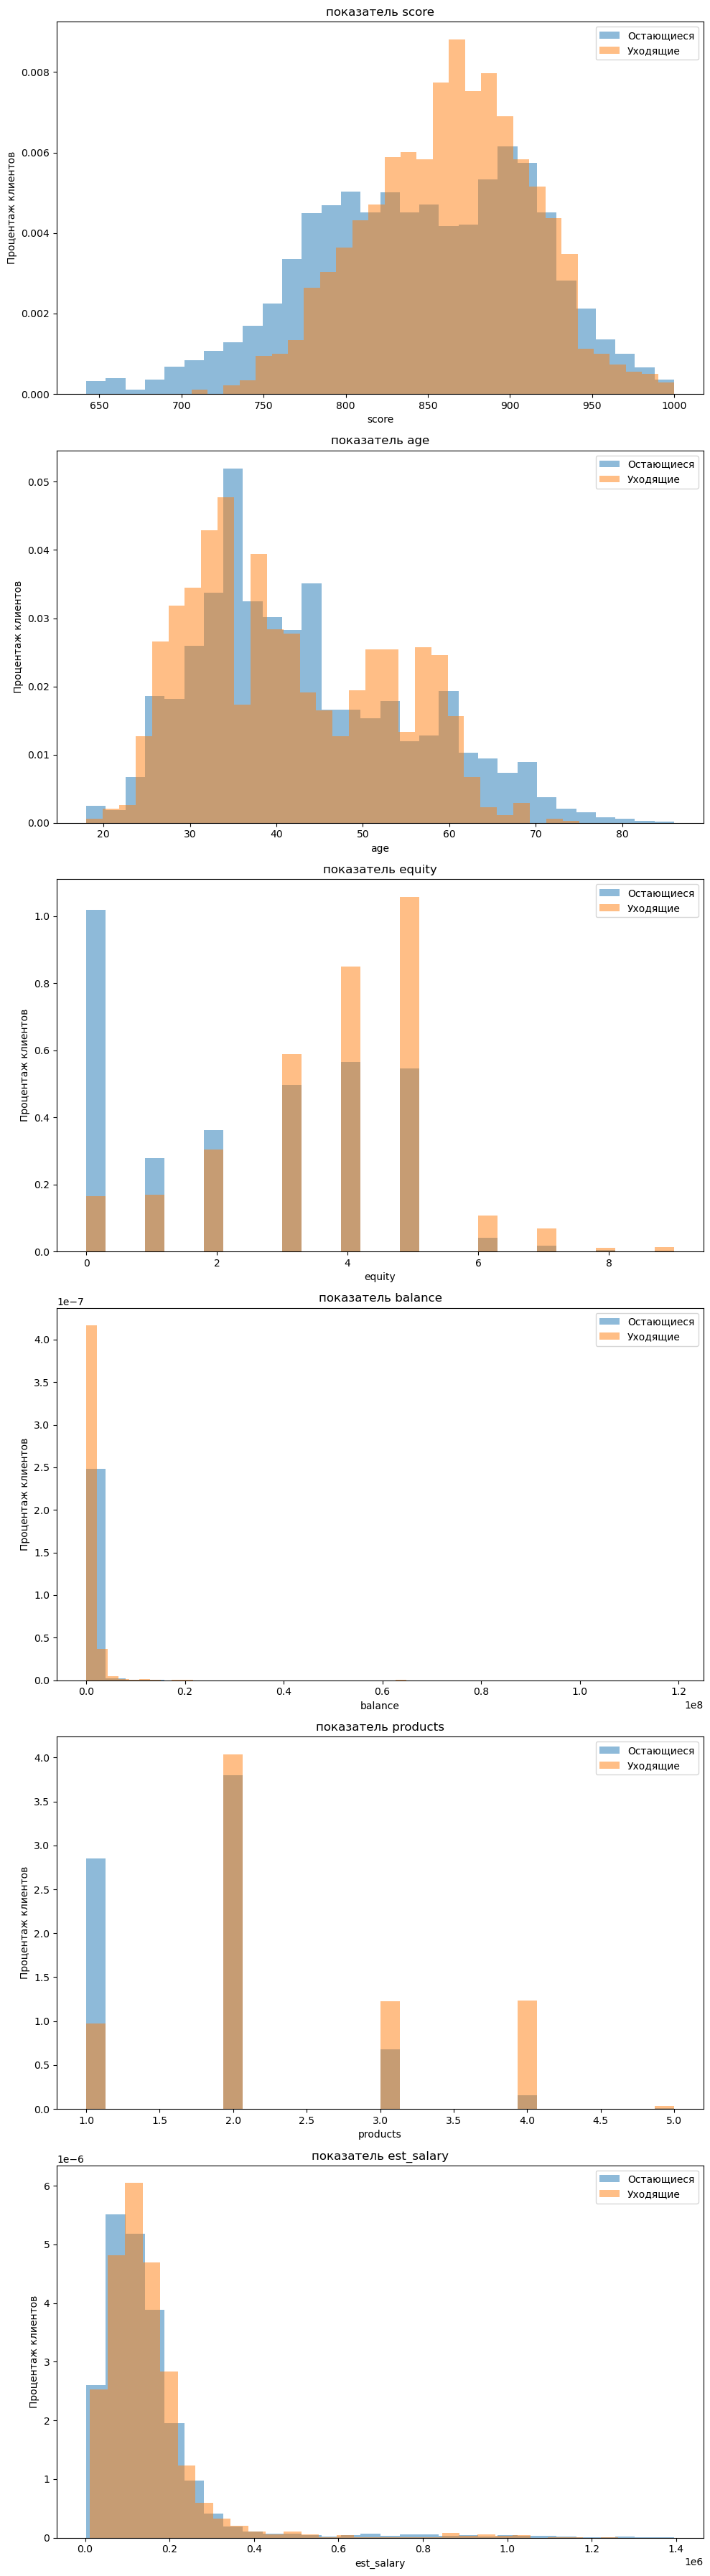

In [57]:
import matplotlib.pyplot as plt

# Определение списка признаков для построения графиков
features = ['score', 'age', 'equity', 'balance', 'products', 'est_salary']

# Создание подграфиков
fig, axs = plt.subplots(len(features), figsize=(10, 6*len(features)))

# Цикл по всем признакам
for i, feature in enumerate(features):
    # Извлечение данных для текущего признака
    non_churn_feature = not_churn_df[feature]
    churn_feature = churn_df[feature]

    # Построение гистограмм на подграфике
    axs[i].hist(non_churn_feature, bins=30, alpha=0.5, label='Остающиеся', density=True)
    axs[i].hist(churn_feature, bins=30, alpha=0.5, label='Уходящие', density=True)

    # Добавление легенды на подграфике
    axs[i].legend(loc='upper right')

    # Подписи осей на подграфике
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Процентаж клиентов')

    # Заголовок подграфика
    axs[i].set_title(f'показатель {feature}')

# Показать график
plt.tight_layout()
plt.show()


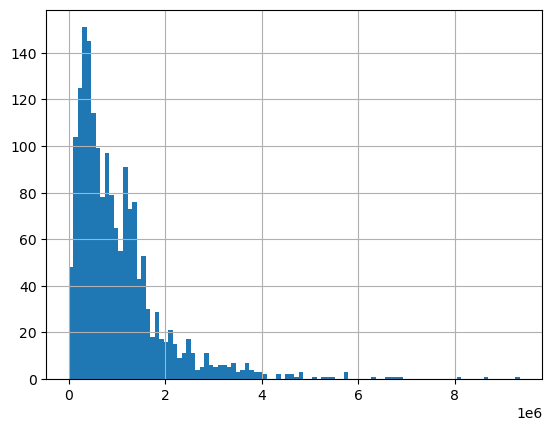

In [58]:
churn_df[churn_df['balance']< 10000000]['balance'].hist(bins=100)
plt.show()

Boolean Series key will be reindexed to match DataFrame index.


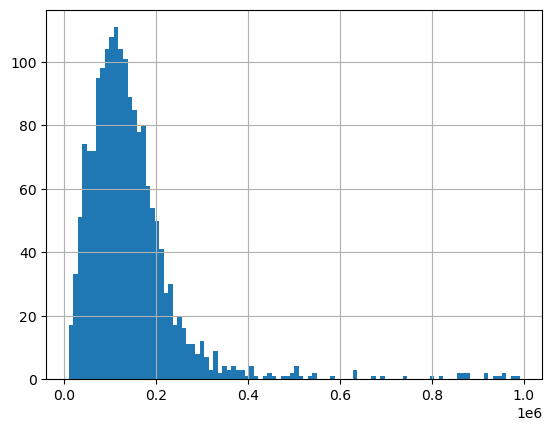

In [59]:
churn_df[(churn_df['est_salary'] < 1000000)&(df['est_salary'] > 0)]['est_salary'].hist(bins=100)
plt.show()

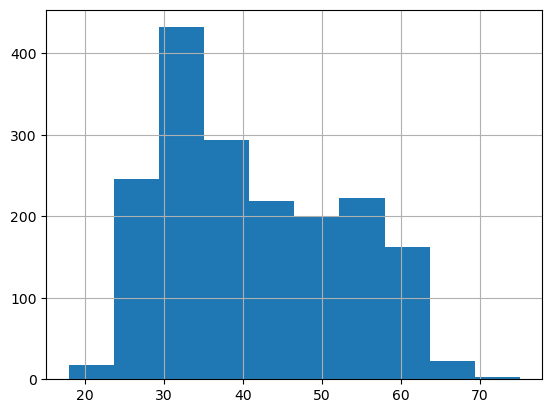

In [60]:
churn_df['age'].hist(bins=10)
plt.show()

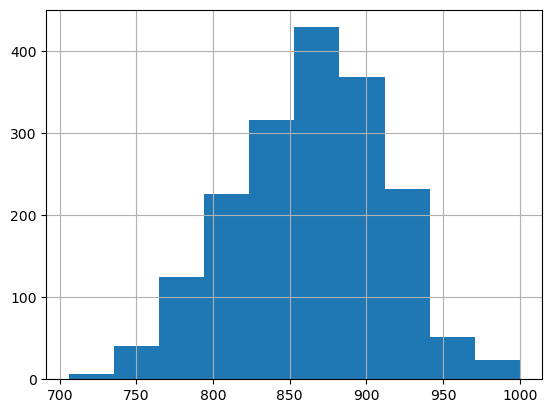

In [61]:
churn_df['score'].hist(bins=10)
plt.show()

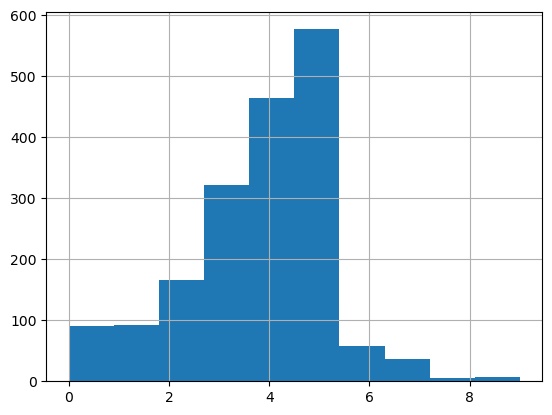

In [62]:
churn_df['equity'].hist(bins=10)
plt.show()

In [63]:
# Анализ кадого признака
for i in ['city', 'equity', 'products', 'credit_card', 'last_activity', 'cod_gender', 'Ростов', 'Рыбинск', 'Ярославль', 'range_balance', 'range_salary', 'range_age', 'range_score']:
    grouped_churn_df = churn_df.groupby(i).agg({'churn':['mean','sum'], 'user_id':'count'}).reset_index()
    total_users = len(churn_df['user_id'])  # общее количество уникальных пользователей
    grouped_churn_df[('churn', 'percent')] = grouped_churn_df['churn']['sum'].apply(lambda x: (x / total_users))
    grouped_churn_df = grouped_churn_df.sort_values(by=[('churn','mean')], ascending=False)
    print(grouped_churn_df.sort_values(by=('churn','percent'), ascending=False))
    print()


        city churn       user_id   churn
              mean   sum   count percent
2  Ярославль 1.000  1117    1117   0.614
1    Рыбинск 1.000   436     436   0.240
0     Ростов 1.000   266     266   0.146

  equity churn      user_id   churn
          mean  sum   count percent
5      5 1.000  577     577   0.317
4      4 1.000  464     464   0.255
3      3 1.000  321     321   0.176
2      2 1.000  166     166   0.091
1      1 1.000   93      93   0.051
0      0 1.000   90      90   0.049
6      6 1.000   58      58   0.032
7      7 1.000   37      37   0.020
9      9 1.000    7       7   0.004
8      8 1.000    6       6   0.003

  products churn      user_id   churn
            mean  sum   count percent
1        2 1.000  979     979   0.538
3        4 1.000  300     300   0.165
2        3 1.000  297     297   0.163
0        1 1.000  235     235   0.129
4        5 1.000    8       8   0.004

  credit_card churn       user_id   churn
               mean   sum   count percent
1         

#### Вывод:
- В городах действительно отток ~16-19%
- Мужчины уходят в два раза чаще
- Из всех уходящих - 61% из Ярославля
- 70% уходящих обладают тремя, четырмя, пятью продуктами
- 70% уходящих - активные пользователи
- 98% владеют баланс до 6486626
- 59% уходящих получают за до 136000 и от 136095 до 261309 - 36% (95% 0-261309)
- 15% уходящих - 24-30 лет, 24% 30-36 лет, 18% 36-42 года (57% 24-42 года)
- 12% уходящих имеют кредитный рейтинг(скоринг) 794-823, 17% 823-853, 24% 853-882, 20% 882-911. 73% (794-911).

### Использование визуализации для отображения результатов

- По оси Х - признаки
- По оси У - процент уходящих
- "Зелёный" цвет - локальный процент уходящих в рамках одного признака
- "Синий" цвет - глобальный процент отношение уходящих ко всем объёму клиентов

### Вывод
Основная часть оттока это клиенты с:
- балансом до двух милионов
- зп до 250000
- от 25 лет до 45
- кредитный рейтинг от ~780 до ~930
- от 2 до 5 баллов собственности, причём 5 это самое популярное значение

## Проверка статистических гипотез

### Гипотеза о различии дохода между клиентами, которые ушли, и теми, кто остался

In [64]:
# Проверим наличие пропущенных значений и обработаем их, если есть
copy_df = df.copy()
copy_df.dropna(subset=["est_salary"], inplace=True)

churned = copy_df[copy_df["churn"] == True]
not_churned = copy_df[copy_df["churn"] == False]

# Проверим нормальность распределения доходов в каждой группе (по желанию)
# Например, используя тест Шапиро-Уилка

p_value_churned = shapiro(churned["est_salary"])
p_value_not_churned = shapiro(not_churned["est_salary"])
p_value_mannwhitneyu = mannwhitneyu(churned["est_salary"], not_churned["est_salary"])

# Выведем результаты тестов

print("Тест Шапиро-Уилка (значение p-value) для группы с оттоком:", p_value_churned[1])
print("Тест Шапиро-Уилка (значение p-value) для группы без оттока:", p_value_not_churned[1])
if p_value_mannwhitneyu[1] > .05:
    print("Тест Манна-Уитни (значение p-value):", p_value_mannwhitneyu[1])
    print('При условии, что нулевая гепотеза это равенство доходов, то такую гепотезу откланить нельзя')
else:
    print("Тест Манна-Уитни (значение p-value):", p_value_mannwhitneyu[1])
    print('Статразличия имеются - доходы отличаются')

Тест Шапиро-Уилка (значение p-value) для группы с оттоком: 0.0
Тест Шапиро-Уилка (значение p-value) для группы без оттока: 0.0
Тест Манна-Уитни (значение p-value): 0.00021160652203623057
Статразличия имеются - доходы отличаются


p-value may not be accurate for N > 5000.


In [65]:
len(df)

9999

### Гепотеза о различии оценки собственности клиентов, которые ушли, и теми, кто остался. Проделать то же самое для баланса, кредитного скоринга, количества продуктов у клиента, наличие кредитки, по гендеру, сравнть активных клиентов с неактивными.

In [66]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,cod_gender,Ростов,Рыбинск,Ярославль,range_balance,range_salary,range_age,range_score
0,183012,850.000,Рыбинск,Ж,25.000,1,"59,214.820",2,0,1,"75,719.140",1,False,0,1,0,"(-0.001, 159201.964]","(66407.932, 83932.904]","(17.999, 29.0]","(832.0, 853.0]"
1,146556,861.000,Рыбинск,Ж,37.000,5,"850,594.330",3,1,0,"86,621.770",0,False,0,1,0,"(660138.374, 853606.368]","(83932.904, 101314.552]","(35.0, 37.0]","(853.0, 873.0]"
2,120722,892.000,Рыбинск,Ж,30.000,0,NaN,1,1,1,"107,683.340",0,False,0,1,0,NaN,"(101314.552, 119661.51]","(29.0, 32.0]","(873.0, 892.0]"
3,225363,866.000,Ярославль,Ж,51.000,5,"1,524,746.260",2,0,1,"174,423.530",1,False,0,0,1,"(1460133.708, 119113552.01]","(161602.132, 189220.662]","(48.0, 54.0]","(853.0, 873.0]"
4,157978,730.000,Ярославль,М,34.000,5,174.000,1,1,0,"67,353.160",1,True,0,0,1,"(-0.001, 159201.964]","(66407.932, 83932.904]","(32.0, 35.0]","(641.999, 765.0]"


In [67]:
columns=['score', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'cod_gender']

In [68]:
for column in columns:
    local_churn = churned[churned[column].notna()]
    local_not_churn = not_churned[not_churned[column].notna()]

    p_value_churned = shapiro(local_churn[column])
    p_value_not_churned = shapiro(local_not_churn[column])
    p_value_mannwhitneyu = mannwhitneyu(local_churn[column], local_not_churn[column])
    _, p_value_ttest = ttest_ind(local_churn[column], local_not_churn[column])

    print(f'Рассматриваем колонку {column}')
    print('Тест Шапиро-Уилка (значение p-value) для группы с оттоком:', p_value_churned[1])
    print('Тест Шапиро-Уилка (значение p-value) для группы без оттока:', p_value_not_churned[1])
    #print('Т-тест:',p_value_ttest)
    if p_value_mannwhitneyu[1] > .05:
        print('Тест Манна-Уитни (значение p-value):', p_value_mannwhitneyu[1])
        print('При условии, что нулевая гепотеза это равенство доходов, то такую гепотезу откланить нельзя')
    else:
        print('Тест Манна-Уитни (значение p-value):', p_value_mannwhitneyu[1])
        print('Статразличия имеются - значения столбца отличаются')
    print()

p-value may not be accurate for N > 5000.


Рассматриваем колонку score
Тест Шапиро-Уилка (значение p-value) для группы с оттоком: 0.00010231484338873997
Тест Шапиро-Уилка (значение p-value) для группы без оттока: 3.817680641163025e-26
Тест Манна-Уитни (значение p-value): 7.364570509844462e-22
Статразличия имеются - значения столбца отличаются

Рассматриваем колонку equity
Тест Шапиро-Уилка (значение p-value) для группы с оттоком: 4.9976689635379296e-30
Тест Шапиро-Уилка (значение p-value) для группы без оттока: 0.0
Тест Манна-Уитни (значение p-value): 2.03458413970638e-158
Статразличия имеются - значения столбца отличаются

Рассматриваем колонку balance
Тест Шапиро-Уилка (значение p-value) для группы с оттоком: 0.0
Тест Шапиро-Уилка (значение p-value) для группы без оттока: 0.0
Тест Манна-Уитни (значение p-value): 2.4600499882458142e-70
Статразличия имеются - значения столбца отличаются

Рассматриваем колонку products
Тест Шапиро-Уилка (значение p-value) для группы с оттоком: 2.3481137977151662e-40
Тест Шапиро-Уилка (значение p

#### Вывод:
- Любые признаки, при условии оттока (churn=1\0) , будут отличаться.

- Тест Шапиро-Уилка используется для проверки нормальности распределения. Это важно, потому что многие статистические тесты, включая t-тест Стьюдента, предполагают, что данные распределены нормально. Поэтому перед применением t-теста полезно проверить это предположение с помощью теста Шапиро-Уилка.
    

- Тест Манна-Уитни также известен как непараметрический t-тест. Он используется, когда данные не распределены нормально, и позволяет сравнить две независимые выборки по их медианам. Непараметрические тесты не делают предположений о распределении данных, поэтому они подходят для данных, которые сильно отличаются от нормального распределения.

    
- T-тест Стьюдента используется для сравнения средних двух независимых выборок. Он предполагает, что данные распределены нормально и что выборки имеют одинаковые дисперсии (или, в случае t-теста Уэлча, этого предположения не требуется). Если эти предположения выполняются, t-тест является мощным инструментом для обнаружения различий между группами.

## Сегментация клиентов

### Применение методов машинного обучения для идентификации групп клиентов, склонных к оттоку

In [69]:
X = ['score','age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary',
       'cod_gender', 'Ростов', 'Рыбинск', 'Ярославль']
y = ['churn']

In [70]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate': 0.02}

In [71]:
model = CatBoostClassifier(**params)

In [72]:
train, test = train_test_split(df,train_size=0.6, random_state=42)

In [73]:
val, test = train_test_split(test,train_size=0.5, random_state=42)

In [74]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.6752235	test: 0.6740813	best: 0.6740813 (0)	total: 175ms	remaining: 2m 55s
100:	learn: 0.3242457	test: 0.3086991	best: 0.3086991 (100)	total: 967ms	remaining: 8.6s
200:	learn: 0.2892655	test: 0.2816530	best: 0.2816530 (200)	total: 1.9s	remaining: 7.55s
300:	learn: 0.2706494	test: 0.2717388	best: 0.2717388 (300)	total: 2.42s	remaining: 5.62s
400:	learn: 0.2563566	test: 0.2668414	best: 0.2668414 (400)	total: 2.93s	remaining: 4.38s
500:	learn: 0.2440297	test: 0.2640082	best: 0.2640082 (500)	total: 3.46s	remaining: 3.45s
600:	learn: 0.2327776	test: 0.2629794	best: 0.2629794 (600)	total: 4.01s	remaining: 2.66s
700:	learn: 0.2232799	test: 0.2616729	best: 0.2616592 (698)	total: 4.53s	remaining: 1.93s
800:	learn: 0.2139987	test: 0.2612079	best: 0.2612079 (800)	total: 5.03s	remaining: 1.25s
900:	learn: 0.2060992	test: 0.2607541	best: 0.2605082 (865)	total: 5.54s	remaining: 609ms
999:	learn: 0.1977999	test: 0.2600283	best: 0.2599392 (993)	total: 6.05s	remaining: 0us

bestTest = 0.259

In [75]:
test.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'cod_gender', 'Ростов', 'Рыбинск', 'Ярославль', 'range_balance',
       'range_salary', 'range_age', 'range_score'],
      dtype='object')

In [76]:
test['score_cat_prod_age_active'] = model.predict(test[X])

In [77]:
test['try'] = test['score_cat_prod_age_active'] == test['churn']

In [78]:
test['try'].mean()

0.885

In [79]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'Ростов', 'Рыбинск', 'Ярославль']


In [80]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,score,20.646
1,balance,17.804
2,age,13.665
3,last_activity,11.439
4,est_salary,7.844
5,products,7.733
6,cod_gender,7.094
7,equity,6.186
8,credit_card,3.828
9,Рыбинск,2.288


In [81]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train[X])

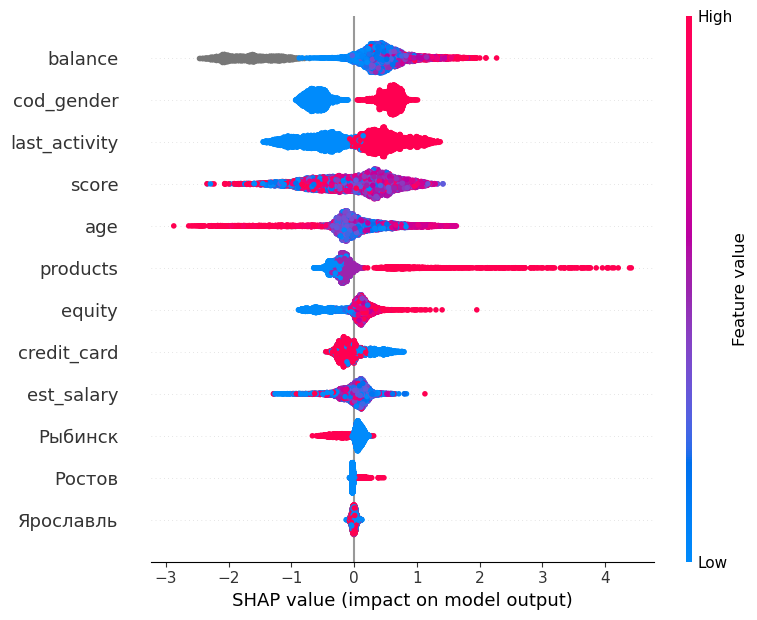

In [82]:
shap.summary_plot(shap_values, train[X])

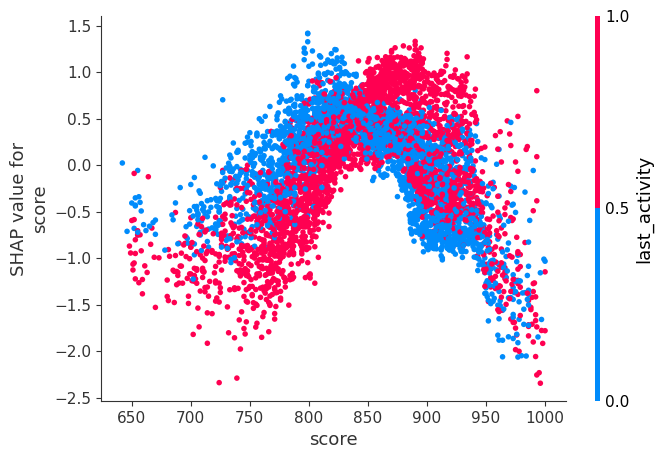

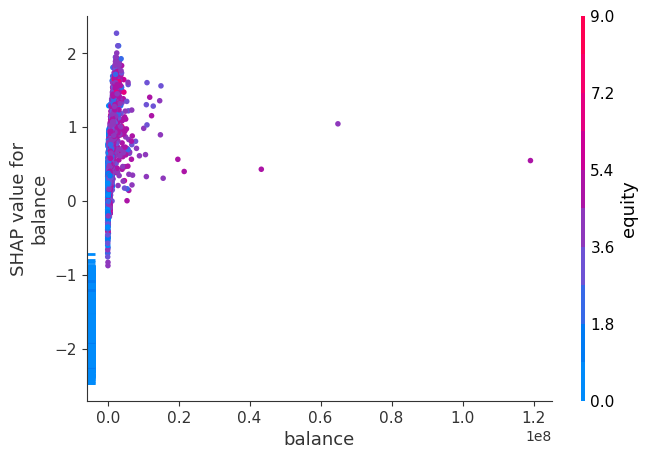

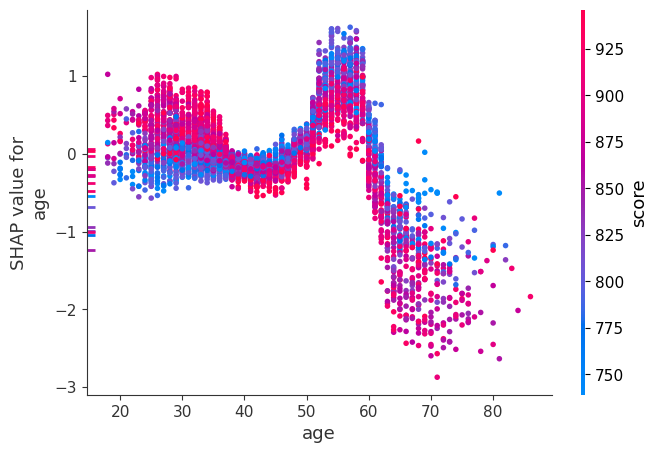

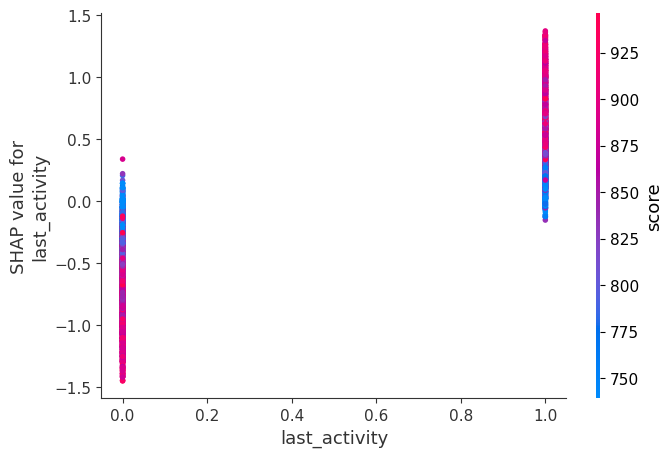

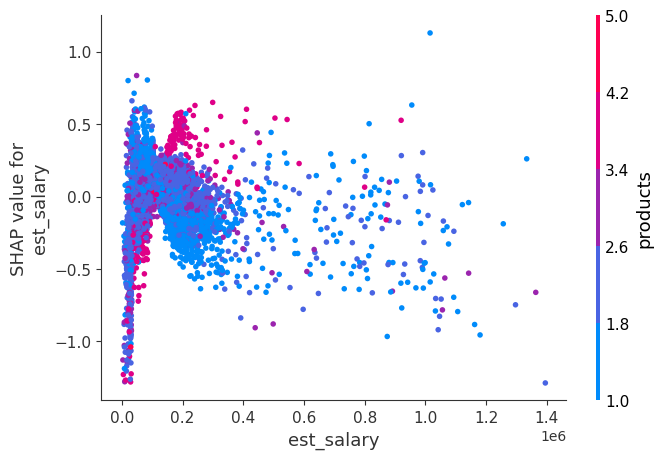

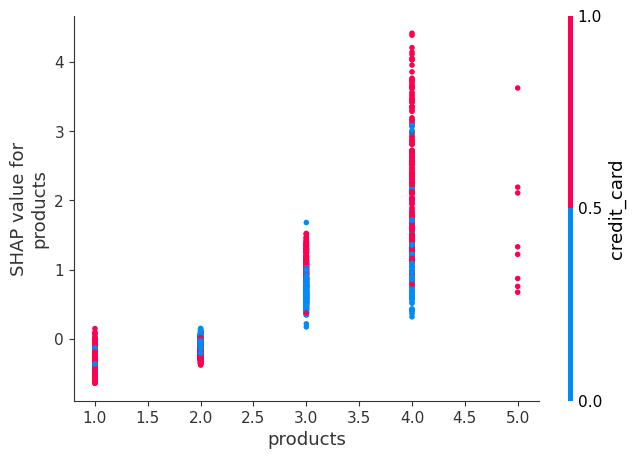

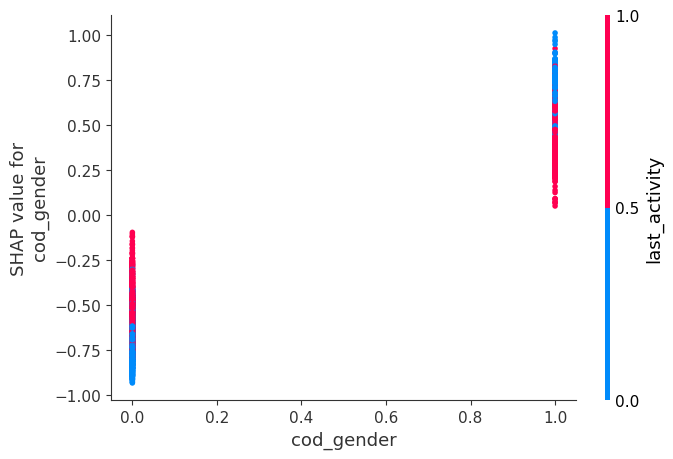

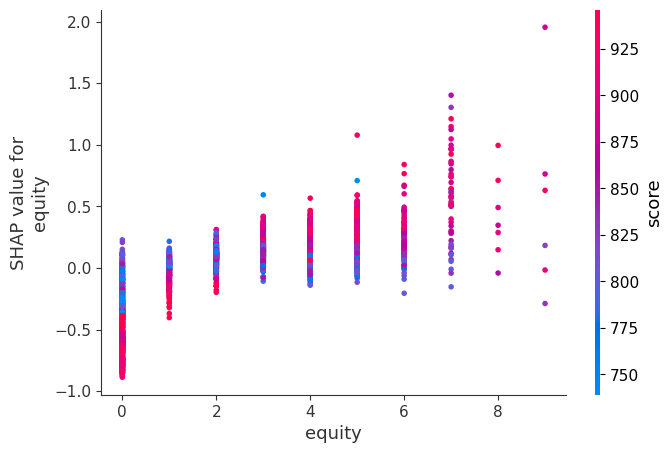

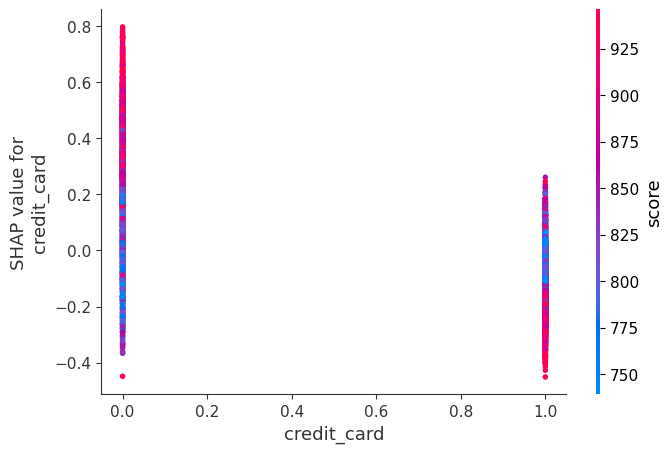

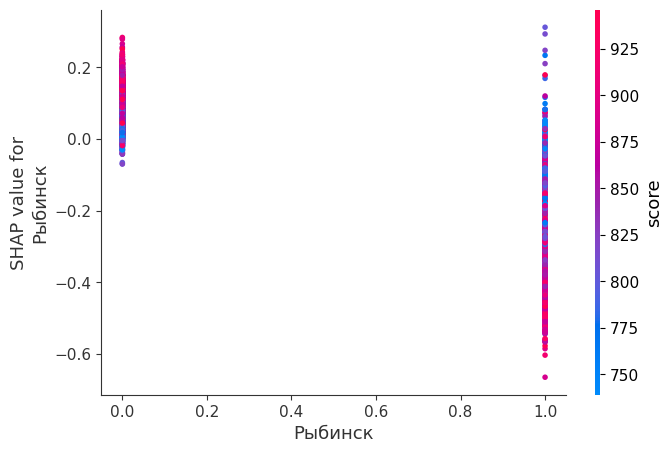

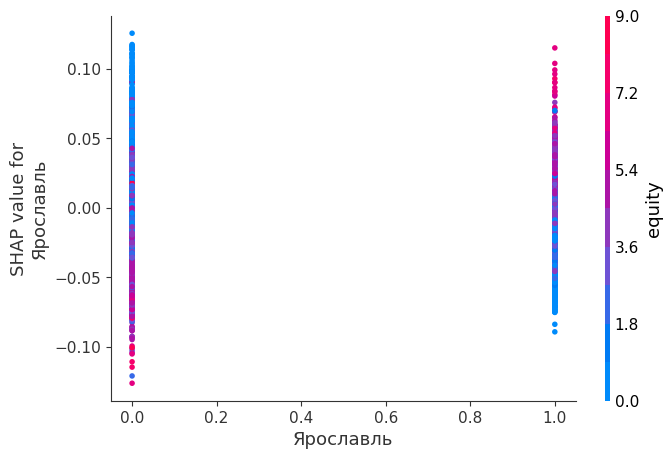

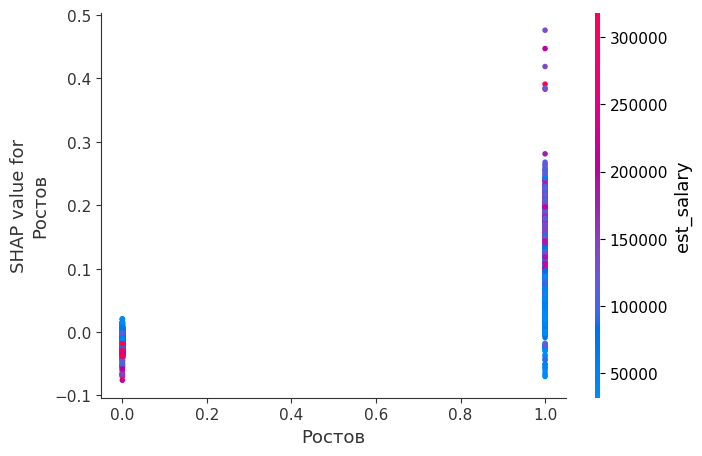

In [83]:
for feature in model.get_feature_importance(prettified=True)['Feature Id'].values:
    shap.dependence_plot(feature, shap_values, train[X])

#### Вывод:
По результатам исследований с применением машинного обучения были получены следующие результаты:
- score имеет самый большой коэфициент влияния
    - примерно до ~820 этот показатель либо никак, либо отрицательно влияет на решение об уходе.
    - такая же ситуация после ~870, при условии низкого значения equity (до 3)
    - с 820 до 870, независимо от equity, рейтинг позитивно вляет на уход.
- balance второй по силе:
    - очень маленький объём баланса отрицательно влияет
    - с ростом баланса влиение позитивно растёт.
- age:
    - клиенты с возрастом до 40 лет и высоким скором (>850) чаще начинают принимать решения об уходе
    - обратная ситуация для длиентов для клиентов с 50 до 60, где высокие показатели скора позитивно влияют на решение об уходе.
    - самые лояльные группы это клиенты с возрастом 40-50 и больше 60
- last_activity:
    - как бы это странно не было, но активные клиенты более заинтересованы в уходе. Возможно проблема в мобильных сервисах.
- product:
    - на графиках видно что с ростом количества продуктов, используемых клиентом, растёт желание покинуть компанию
    
По городам:
- Рыбинск (чаще хотят остаться, чем уйти)
- Ростов (чаще уходят, чем остаются)
- Ярославль (примерное равные значения желающих уходить и оставаться)

In [84]:
# скор от 820 до 870, до 40 лет, активные пользователи.
print('Количество в этом сегменте = ',len(df[(df['score'].between(820,870))&(df['age']<40)&(df['last_activity']==1)]))
print('Доля уходящих =',df[(df['score'].between(820,870))&(df['age']<40)&(df['last_activity']==1)]['churn'].mean())

Количество в этом сегменте =  633
Доля уходящих = 0.4154818325434439


In [85]:
df[(df['score'].between(820,870))&(df['age']<40)&(df['last_activity']==1)].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
count,633.000,633.000,633.000,633.000,631.000,633.000,633.000,633.000,633.000,633.000,633.000,633.000,633.000
mean,"167,606.821",845.193,32.100,3.648,"562,963.574",2.291,0.630,1.000,"108,347.111",0.415,0.158,0.281,0.561
std,"35,209.404",14.926,4.653,1.565,"446,594.560",0.997,0.483,0.000,"77,839.625",0.493,0.365,0.450,0.497
min,"94,561.000",820.000,18.000,0.000,780.420,1.000,0.000,1.000,"5,043.140",0.000,0.000,0.000,0.000
25%,"136,404.000",832.000,29.000,3.000,"255,774.125",2.000,0.000,1.000,"58,379.290",0.000,0.000,0.000,0.000
50%,"166,917.000",846.000,32.000,4.000,"439,747.650",2.000,1.000,1.000,"92,034.540",0.000,0.000,0.000,1.000
75%,"197,683.000",858.000,36.000,5.000,"743,236.965",3.000,1.000,1.000,"140,753.330",1.000,0.000,1.000,1.000
max,"229,009.000",870.000,39.000,9.000,"3,259,830.650",5.000,1.000,1.000,"870,724.090",1.000,1.000,1.000,1.000


In [86]:
df[(df['score']>870)&(df['equity'] > 3)&(df['cod_gender'])==True]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,cod_gender,Ростов,Рыбинск,Ярославль,range_balance,range_salary,range_age,range_score
8,211686,923.000,Ярославль,М,54.000,5,"1,206,337.870",2,1,0,"155,371.790",0,True,0,0,1,"(1125547.2, 1460133.708]","(139376.386, 161602.132]","(48.0, 54.0]","(908.0, 928.0]"
18,136651,876.000,Ярославль,М,40.000,5,"2,307,947.360",2,0,0,"287,010.610",0,True,0,0,1,"(1460133.708, 119113552.01]","(242397.334, 1395064.45]","(37.0, 40.0]","(873.0, 892.0]"
22,161656,871.000,Ярославль,М,51.000,4,"708,866.920",1,1,0,"106,407.260",0,True,0,0,1,"(660138.374, 853606.368]","(101314.552, 119661.51]","(48.0, 54.0]","(853.0, 873.0]"
44,210313,935.000,Ярославль,М,41.000,5,"3,781,118.220",2,1,0,"761,349.200",0,True,0,0,1,"(1460133.708, 119113552.01]","(242397.334, 1395064.45]","(40.0, 44.0]","(928.0, 1000.0]"
72,156677,873.000,Ярославль,М,39.000,5,"915,959.850",3,0,1,"154,034.620",1,True,0,0,1,"(853606.368, 1125547.2]","(139376.386, 161602.132]","(37.0, 40.0]","(853.0, 873.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,197891,899.000,Ярославль,М,37.000,5,"1,422,472.420",2,0,1,"231,978.680",1,True,0,0,1,"(1125547.2, 1460133.708]","(189220.662, 242397.334]","(35.0, 37.0]","(892.0, 908.0]"
9942,199340,890.000,Ярославль,М,61.000,4,"1,041,694.290",2,1,1,"132,913.410",0,True,0,0,1,"(853606.368, 1125547.2]","(119661.51, 139376.386]","(54.0, 61.0]","(873.0, 892.0]"
9963,187204,957.000,Ярославль,М,35.000,4,"3,431,029.030",4,1,0,"354,987.430",1,True,0,0,1,"(1460133.708, 119113552.01]","(242397.334, 1395064.45]","(32.0, 35.0]","(928.0, 1000.0]"
9981,154871,892.000,Рыбинск,М,39.000,5,"636,287.720",2,0,1,"227,288.270",1,True,0,1,0,"(524272.2, 660138.374]","(189220.662, 242397.334]","(37.0, 40.0]","(873.0, 892.0]"


In [87]:
df[(df['score']>870)&(df['equity'] > 3)&(df['cod_gender'])==True]['churn'].mean()
print('Количество в этом сегменте = ',len(df[(df['score']>870)&(df['equity'] > 3)&(df['cod_gender'])==True]))
print('Доля уходящих =',df[(df['score']>870)&(df['equity'] > 3)&(df['cod_gender'])==True]['churn'].mean())

Количество в этом сегменте =  860
Доля уходящих = 0.5069767441860465


## Вывод

1. Клиентская база представлена в основном клиентами в возрасте от 25 до 45 лет, с оценочными доходами до 170000, а большинство из них держат на своих счетах не более миллиона. Они в основном пользуются одним или двумя продуктами банка, с уклоном в сторону двух продуктов.

2. Город с наибольшим количеством клиентов - Ярославль, затем идут Рыбинск и Ростов. Пол клиентов разделён поровну между мужчинами и женщинами. Примерно 68% клиентов обладают кредитной картой, и 52% активно пользуются услугами банка.

3. Взаимосвязи между переменными обнаружены. Например, есть положительная корреляция между размером активов (equity) и количеством продуктов, что говорит о том, что клиенты с большим объемом активов чаще пользуются большим количеством продуктов. Также обнаружена отрицательная корреляция между наличием кредитной карты и количеством продуктов.

4. Процент оттока клиентов в городах находится на уровне около 16-19%. Мужчины уходят в два раза чаще, и 61% уходящих клиентов - из Ярославля. Большинство уходящих клиентов активно пользуются услугами банка и имеют от трех до пяти продуктов.

5. По результатам машинного обучения, самый большой вклад в вероятность оттока вносит показатель "score". Баланс на счету и возраст клиента также важны. В целом, активные клиенты, особенно молодые и со значительным балансом на счету, склонны к уходу. Это может быть вызвано недовольством услугами банка или предложениями конкурентов.

6. На региональном уровне, клиенты из Ростова склонны уходить, в то время как клиенты из Рыбинска чаще остаются. В Ярославле ситуация более равномерная.

## Рекомендации

Сегмент 1: Клиенты с скорингом от 820 до 870, возрастом до 40 лет и являющиеся активными
- Таргетированные финансовые продукты:
    - Разработайте продукты и услуги, которые отвечают специфическим потребностям этого сегмента - молодые и активные клиенты, которые только начинают свою финансовую жизнь. Это может быть кредиты на образование, автокредиты, ипотека или услуги по планированию на будущее.
- Диджитализация:
    - Учитывая, что это более молодой и активный сегмент, вероятно, они будут оценивать быстроту и удобство цифровых услуг. Инвестиции в мобильное банковское приложение или другие онлайн-платформы могут быть полезны.
- Предложения на основе активности:
    - Предлагайте специальные скидки или привилегии за активное использование продуктов банка. Это может включать бонусные программы, кэшбек и др.

Сегмент 2: Клиенты-мужчины, со скорингом от 870 и оценкой собственности от трёх
- Премиум-обслуживание:
    - Этот сегмент вероятно включает в себя клиентов с высоким доходом. Предлагайте премиальное обслуживание, которое может включать в себя личного менеджера по обслуживанию, более выгодные условия по кредитам и инвестициям, а также привилегии в партнерских организациях.
- Инвестиционные продукты.
    - Учитывая высокий скоринговый балл и оценку собственности, эти клиенты могут быть заинтересованы в инвестиционных продуктах. Банк может предложить инвестиционные советы или продукты, которые помогут этим клиентам увеличить свой капитал.
- Консультационные услуги:
    - Предложите консультационные услуги по вопросам финансового планирования, налогообложения, инвестиций и прочего. Это поможет клиентам более эффективно управлять своими активами и возможно повысит их лояльность.
